In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [18]:
df_hosp = pd.read_excel('HospitalDatabase.xlsx',sheet_name = None)
pats=df_hosp['Patients']
ed_visits=df_hosp['EDVisits']
amb_visits=df_hosp['AmbulatoryVisits']
re_adm=df_hosp['ReAdmissionRegistry']
discharges=df_hosp['Discharges']
providers=df_hosp['Providers']
ed_unique=df_hosp['EDUnique']

# 61:Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [9]:
hypertension_count = amb_visits.loc[(amb_visits['BloodPressureSystolic'] > 180) & (amb_visits['BloodPressureDiastolic'] > 120), 'PatientMRN'].nunique()

print("Count of patients prone to hypertension crisis:", hypertension_count)

Count of patients prone to hypertension crisis: 87


# 62:Which patient id has most entries in readmission registry.

In [10]:
most_common_patient_id = re_adm['PatientID'].value_counts().idxmax()
most_common_patient_entries = re_adm['PatientID'].value_counts().max()

print(f"Patient ID: {most_common_patient_id} has the most entries in the readmission registry with {most_common_patient_entries} entries")

Patient ID: 23 has the most entries in the readmission registry with 3 entries


# 63:If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [11]:
def add_title(first_name, last_name, gender):
    full_name = f"{first_name} {last_name}"
    if gender == 'Female':
        return 'Ms. ' + full_name
    elif gender == 'Male':
        return 'Mr. ' + full_name
    else:
        return full_name

# Apply the function to create the ModifiedName column
pats['ModifiedName'] = pats.apply(lambda row: add_title(row['FirstName'], row['LastName'], row['Gender']), axis=1)

pats['ModifiedName']

0             Mr. Lanni Sue
1             Mr. Far Myers
2       Mr. Devlin  Michael
3         Mr. Carmine Texas
4            Mr. Tann  Bama
               ...         
940         Mr. Wat Fideler
941     Mr. Wandie Baythrop
942     Mr. Diahann Smeeton
943    Mr. Panchito Sharple
944        Mr. Walsh Calvie
Name: ModifiedName, Length: 945, dtype: object

# 64:Plot a graph by counting the no. of patients in each department.

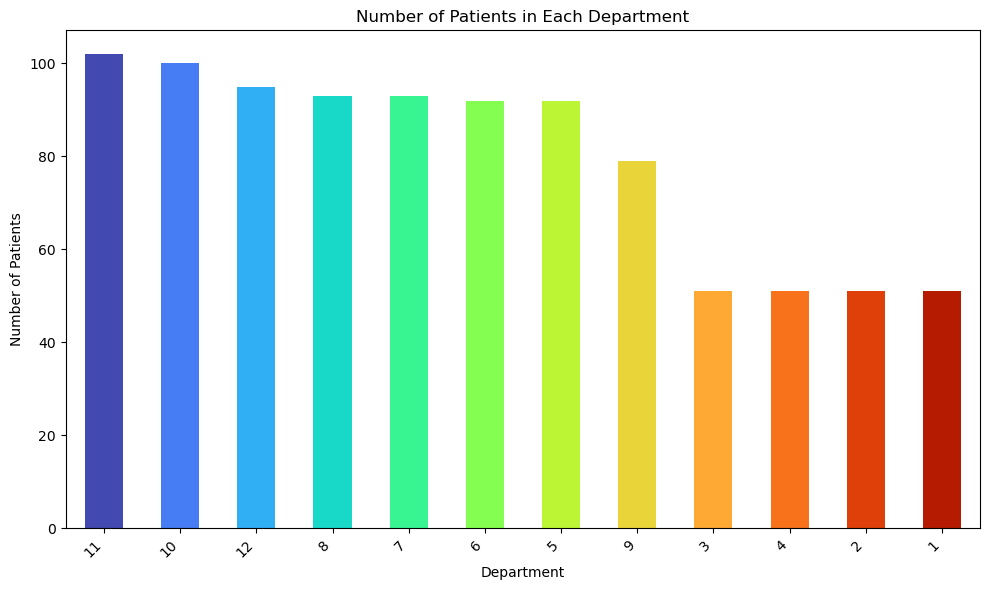

In [244]:
department_counts = amb_visits['VisitDepartmentID'].value_counts()

sequential_palette = sns.color_palette("turbo", n_colors=len(department_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color=sequential_palette)
plt.title('Number of Patients in Each Department')
plt.xlabel('Department')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# 65:Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'. Create a new column to show your analysis.  

In [150]:
# Create bin widths for different levels of hypertension
bin_widths = [0, 120, 129, 139, 180, float('inf')]
labels = ['No Hypertension', 'Mild Hypertension', 'Moderate Hypertension', 'High Hypertension', 'Severe Hypertension']

# Create a new column 'HypertensionLevel' based on readings
amb_visits['HypertensionLevel'] = pd.cut(amb_visits['BloodPressureSystolic'], bins=bin_widths, labels=labels)

print(amb_visits[['PatientMRN', 'BloodPressureSystolic', 'HypertensionLevel']])


     PatientMRN  BloodPressureSystolic      HypertensionLevel
0           840                  188.0    Severe Hypertension
1           820                  179.0      High Hypertension
2           879                  133.0  Moderate Hypertension
3           884                  132.0  Moderate Hypertension
4            32                  131.0  Moderate Hypertension
..          ...                    ...                    ...
945         873                  187.0    Severe Hypertension
946         855                  182.0    Severe Hypertension
947         865                  150.0      High Hypertension
948         635                  177.0      High Hypertension
949         847                  165.0      High Hypertension

[950 rows x 3 columns]


# 66:Plot a graph showing the count of patients for the reason visited the hospital.

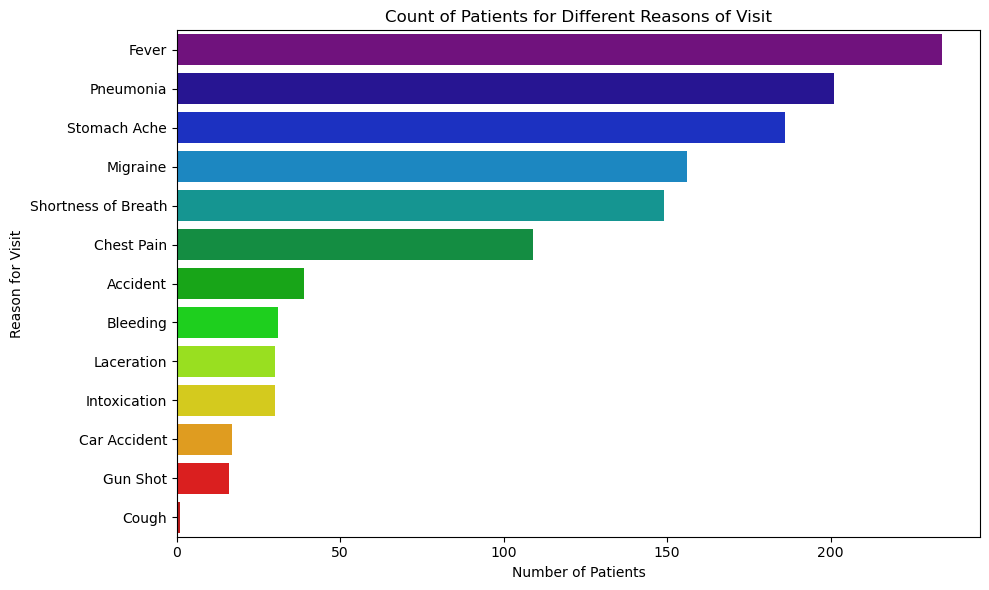

In [168]:
#  Count the number of patients by reason for visit
reason_counts = ed_visits['ReasonForVisit'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='nipy_spectral')
plt.title('Count of Patients for Different Reasons of Visit')
plt.xlabel('Number of Patients')
plt.ylabel('Reason for Visit')
plt.tight_layout()
plt.show()


# 67:Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

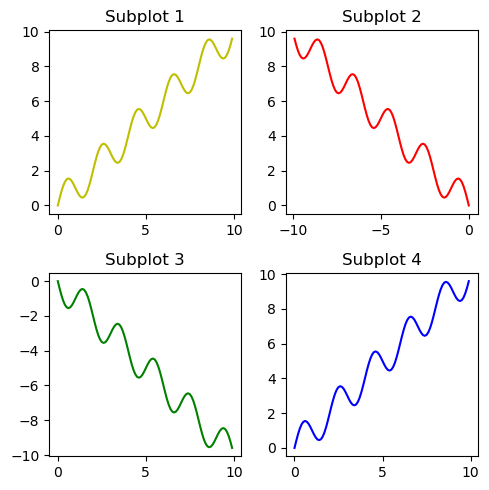

In [31]:
# Create x,y
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

# Create a 2x2 grid
fig, axs = plt.subplots(2, 2,figsize=(5, 5))

# First subplot
axs[0, 0].plot(x, y,'y')
axs[0, 0].set_title('Subplot 1')

# Second subplot
axs[0, 1].plot(-x, y, 'r')
axs[0, 1].set_title('Subplot 2')

# Third subplot
axs[1, 0].plot(x, -y, 'g')
axs[1, 0].set_title('Subplot 3')

# Fourth subplot
axs[1, 1].plot(x, y, 'b')
axs[1, 1].set_title('Subplot 4')

# Adjust layout
plt.tight_layout()

plt.show()


# 68:Make a pivot table by the no. of patients from the admission date till discharge date.

In [186]:
# Convert AdmissionDate and DischargeDate to datetime format
re_adm['AdmissionDate'] = pd.to_datetime(re_adm['AdmissionDate'])
re_adm['DischargeDate'] = pd.to_datetime(re_adm['DischargeDate']).dt.date

# Create a pivot table for the count of patients based on AdmissionDate, DischargeDate,
pivot_table = re_adm.pivot_table(values='PatientID', index=['AdmissionDate', 'DischargeDate'], aggfunc='count')
pivot_table.rename(columns={'PatientID': 'PatientCount'}, inplace=True)

print(pivot_table)

                             PatientCount
AdmissionDate DischargeDate              
2018-01-01    2018-01-04                3
              2018-01-05                2
              2018-01-06                1
              2018-01-07                3
              2018-01-08                1
...                                   ...
2018-02-22    2018-03-05                1
              2018-03-06                1
              2018-03-07                4
              2018-03-08                2
              2018-03-10                2

[459 rows x 1 columns]


# 69:Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [173]:
# Convert date columns to datetime
discharges['AdmissionDate'] = pd.to_datetime(discharges['AdmissionDate'])
discharges['DischargeDate'] = pd.to_datetime(discharges['DischargeDate'])

# Calculate LOS
discharges['LOS'] = (discharges['DischargeDate'] - discharges['AdmissionDate']).dt.days

# Create a pivot table for average LOS based on Service and Primary Diagnosis
pivot_table = discharges.pivot_table(index=['Service', 'PrimaryDiagnosis'], values='LOS', aggfunc='mean')
pivot_table['LOS'] = pivot_table['LOS'].round(2)

print(pivot_table)


                                       LOS
Service          PrimaryDiagnosis         
Cardiology       AMI                 10.25
                 Afib                11.20
                 Broken Leg          10.67
                 Flu                 12.00
                 Heart Failure        9.51
                 Kidney Failure       4.00
General Medicine Broken Leg          13.00
                 Diabetes            10.29
                 Fever                8.00
                 Flu                  9.89
                 Hypertension         8.91
                 Kidney Failure      10.67
                 Laceration           9.43
                 Pneumonia            9.42
                 Stroke              11.25
Hospitalist      AMI                 10.00
                 Broken Leg           7.67
                 Diabetes             8.85
                 Fever               10.67
                 Flu                  8.74
                 Hypertension        10.67
           

# 70:Create a visualization on the count of patients based on primary diagnosis.

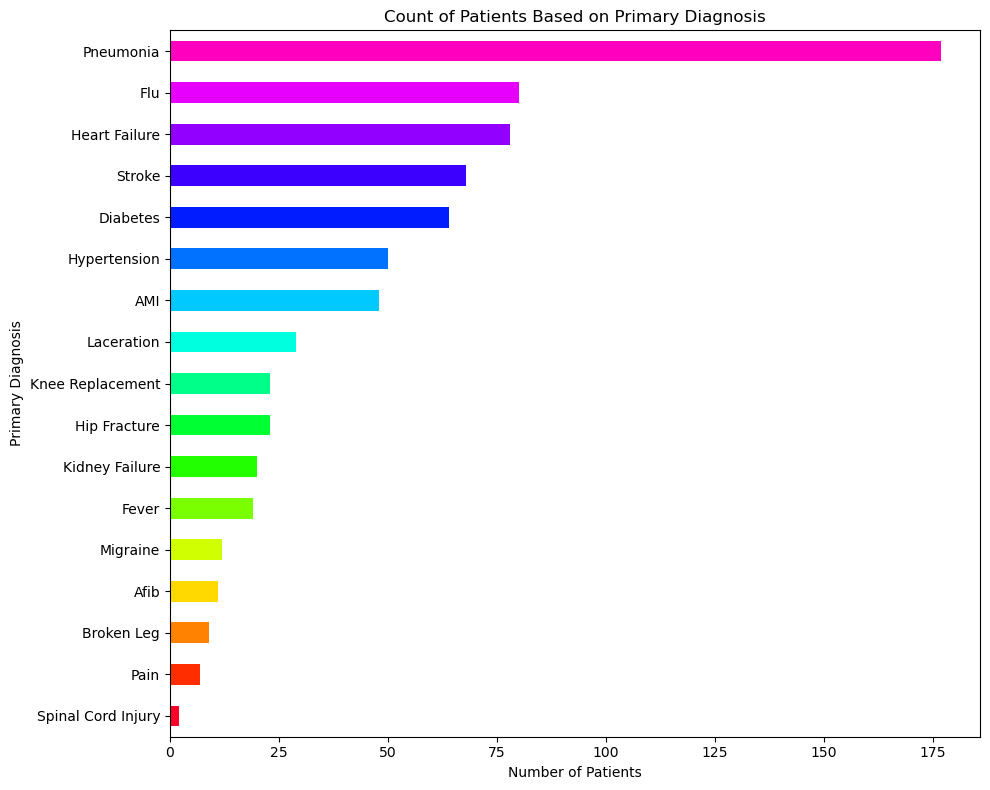

In [202]:
# Count of patients based on Primary Diagnosis
diagnosis_counts = discharges['PrimaryDiagnosis'].value_counts()

# Sort the diagnosis_counts in descending order
diagnosis_counts = diagnosis_counts.sort_values(ascending=True)

# Create a colormap
cmap = cm.get_cmap('gist_rainbow', len(diagnosis_counts))

# Plot Bar chart
plt.figure(figsize=(10, 8))
diagnosis_counts.plot(kind='barh', color=[cmap(i) for i in range(len(diagnosis_counts))])
plt.title('Count of Patients Based on Primary Diagnosis')
plt.xlabel('Number of Patients')
plt.ylabel('Primary Diagnosis')
plt.tight_layout()

plt.show()


# 71:Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [59]:
# Split the "ProviderName" column into "FirstName" and "LastName"
providers[['FirstName', 'LastName']] =providers['ProviderName'].str.split(' ',expand=True)

print(providers[['ProviderName', 'FirstName', 'LastName']])

       ProviderName  FirstName  LastName
0         Sally Sue      Sally       Sue
1        Mike Myers       Mike     Myers
2    Jordan Michael     Jordan   Michael
3         Ted Texas        Ted     Texas
4          Ala Bama        Ala      Bama
5        Harry Kane      Harry      Kane
6         Barry Bar      Barry       Bar
7         Ted Green        Ted     Green
8         Ted Black        Ted     Black
9          Fred Man       Fred       Man
10     Kim Kimberly        Kim  Kimberly
11         Sarah Ab      Sarah        Ab
12  Abigail Marriot    Abigail   Marriot
13          Dave Yu       Dave        Yu
14  Christian Saint  Christian     Saint
15     Perry Pardon      Perry    Pardon
16     Kent Kendall       Kent   Kendall
17       Ryan Kevin       Ryan     Kevin
18     Tyler Conner      Tyler    Conner
19    Bailey Barret     Bailey    Barret
20      Megan Bonco      Megan     Bonco
21    Joesph Walter     Joesph    Walter
22      Walter King     Walter      King
23        Luke L

 # 72:Create a boxplot on ExpectedLOS by taking service into account.

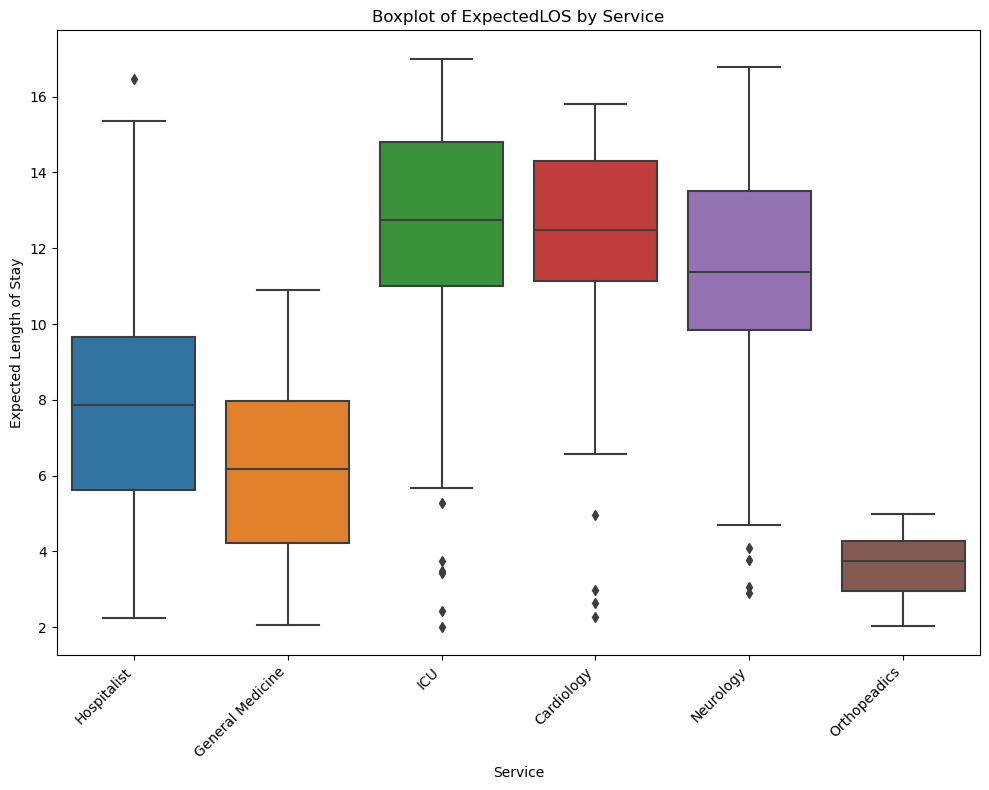

In [75]:
# Create a boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Service', y='ExpectedLOS', data=re_adm)
plt.title('Boxplot of ExpectedLOS by Service')
plt.xlabel('Service')
plt.ylabel('Expected Length of Stay')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


# 73:Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).

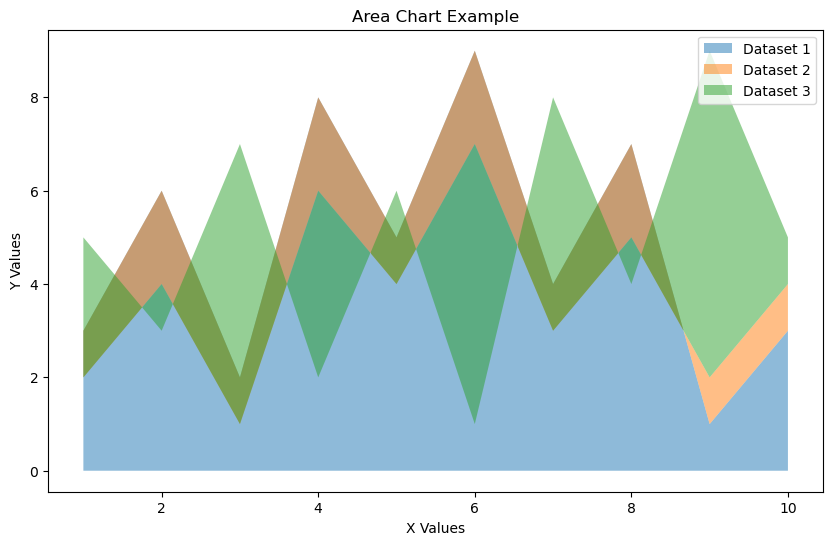

 # 74: Number of patients on 'Transfer' based on primary diagnosis.

In [83]:
# Filter only "transfer"
transfer_cases = re_adm[re_adm['DischargeDisposition'] == 'Transfer']

# Count the patients based on primary diagnosis
diagnosis_counts = transfer_cases['PrimaryDiagnosis'].value_counts()

print(diagnosis_counts)

Stroke              9
Heart Failure       9
Pneumonia           8
Diabetes            7
Flu                 2
Afib                1
Knee Replacement    1
Laceration          1
Pain                1
Name: PrimaryDiagnosis, dtype: int64


# 75: Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [246]:
# Find the index of the row with maximum BloodPressureSystolic
max_systolic_index = amb_visits['BloodPressureSystolic'].idxmax()

# Retrieve row using the Index
row_with_max_systolic = amb_visits.loc[max_systolic_index]

print("Row with Maximum BloodPressureSystolic:")
print(row_with_max_systolic)

Row with Maximum BloodPressureSystolic:
VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
HypertensionLevel                Severe Hypertension
hypertension_category            Severe Hypertension
Name: 236, dtype: object


# 76: Create a pie chart by taking Service= ["ICU", "Neurology", "General Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

# 77: Calculate mortality by diagnosis.

PrimaryDiagnosis
AMI                   0.24
Afib                  0.30
Broken Leg            0.28
Diabetes              0.29
Fever                 0.30
Flu                   0.27
Heart Failure         0.39
Hip Fracture          0.37
Hypertension          0.30
Kidney Failure        0.25
Knee Replacement      0.29
Laceration            0.27
Migraine              0.57
Pain                  0.55
Pneumonia             0.37
Spinal Cord Injury    0.20
Stroke                0.44
Name: ExpectedMortality, dtype: float64


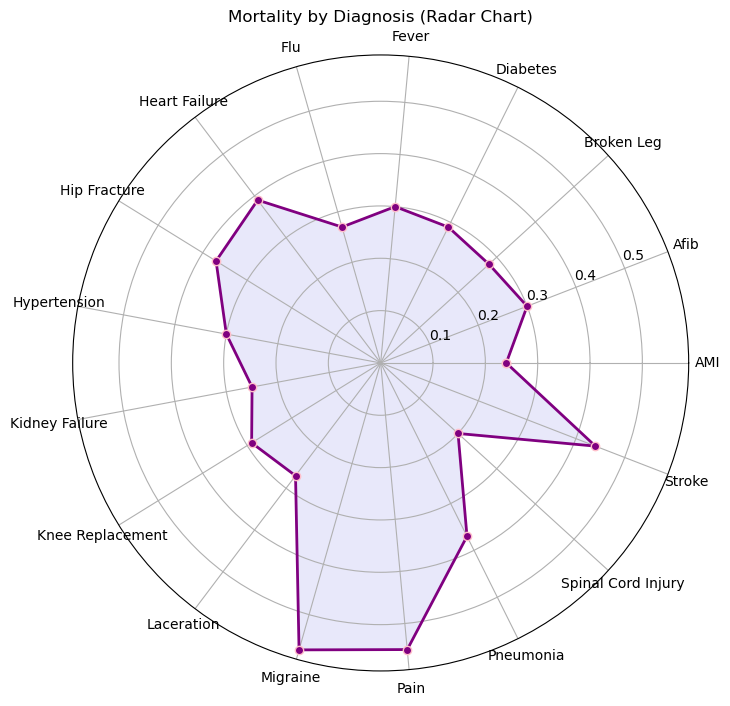

In [240]:
# List of diagnoses and corresponding mortality
diagnoses = mortality_by_diagnosis.index.tolist()
mortality_values = mortality_by_diagnosis.values.tolist()

num_vars = len(diagnoses)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

angles += angles[:1]

mortality_values += mortality_values[:1]

# Create the radar chart
plt.figure(figsize=(8, 8))
plt.polar(angles, mortality_values, marker='o', color='purple', linestyle='solid', linewidth=2, markeredgecolor='pink')

# Set the angle labels
plt.xticks(angles[:-1], diagnoses)

# Fill the area under the radar plot
plt.fill(angles, mortality_values, color='lavender', alpha=0.9)

plt.title('Mortality by Diagnosis (Radar Chart)')
plt.show()


# 78: Calculate the time spent in ED Department for each visit.

In [236]:
# Convert VisitDate and EDDischargeTime to datetime objects
ed_unique['VisitDate'] = pd.to_datetime(ed_unique['VisitDate'])
ed_unique['EDDischargeTime'] = pd.to_datetime(ed_unique['EDDischargeTime'])

# Calculate time spent in ED for each visit
ed_unique['TimeSpentInED'] = ed_unique['EDDischargeTime'] - ed_unique['VisitDate']

# Convert timedelta to total seconds
ed_unique['total_seconds'] = ed_unique['TimeSpentInED'].dt.total_seconds()

# Format total seconds as hours:minutes:seconds
ed_unique['TimeSpent'] = ed_unique.apply(lambda row: '{}:{:02d}:{:02d}'.format(int(row['total_seconds'] // 3600), int((row['total_seconds'] % 3600) // 60), int(row['total_seconds'] % 60)), axis=1)

print(ed_unique[['PatientID', 'TimeSpent']])

     PatientID TimeSpent
0            1  11:20:22
1           12  23:14:20
2           13   1:50:56
3           14   1:20:09
4           15   2:38:20
..         ...       ...
940        929  15:53:09
941        932  22:27:04
942        933   4:30:03
943        934   6:10:35
944        935  10:49:26

[945 rows x 2 columns]


# 79: Which departmentID has maximum number of visits scheduled.

In [120]:
# Group the data by 'DepartmentID' and count the number of visits in each department
department_visit_counts = amb_visits['VisitDepartmentID'].value_counts()

# Find the department with the maximum number of visits
max_visit_department = department_visit_counts.idxmax()

# Get the number of visits associated with the highest visit count
max_visit_count = department_visit_counts[max_visit_department]

# Print the department with the maximum number of visits and the associated visit count
print("Department with the maximum number of visits:", max_visit_department)
print("Number of visits:", max_visit_count)

Department with the maximum number of visits: 11
Number of visits: 102


# 80. Plot a graph to show the distribution of expected mortality.

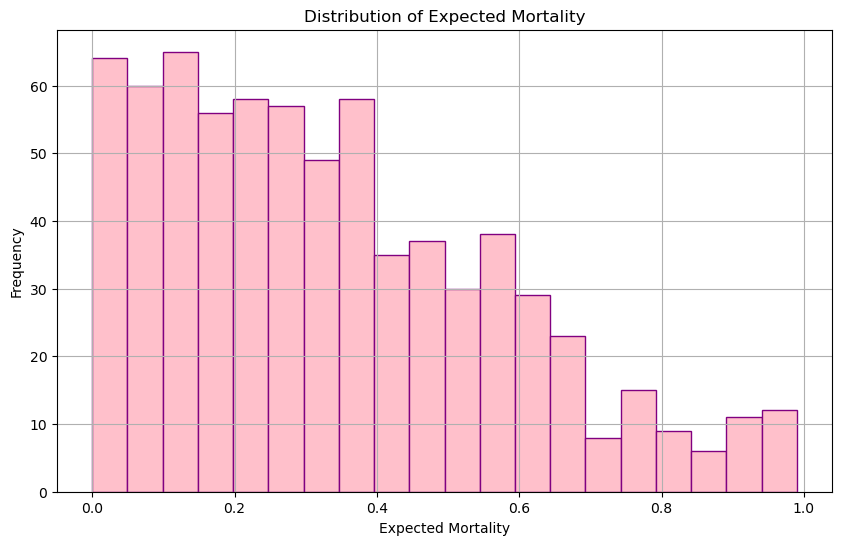

In [130]:
# Extract the 'ExpectedMortality' column
expected_mortality = re_adm['ExpectedMortality']

# Create a histogram to show the distribution of expected mortality
plt.figure(figsize=(10, 6))
plt.hist(expected_mortality, bins=20, edgecolor='purple', color='pink', alpha=1) 

plt.title('Distribution of Expected Mortality')
plt.xlabel('Expected Mortality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [225]:

merged_df = pd.merge(amb_visits, pats, left_on='PatientMRN', right_on='PatientID', how='inner')

print(merged_df)

     VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
0        202         840          29  2019-03-19 2019-03-13 07:59:24.000   
1        688         840          17  2019-03-29 2019-03-06 15:09:42.945   
2        456         840          11  2019-04-08 2019-03-28 08:58:58.755   
3        436         820          25  2019-03-19 2019-02-24 07:10:31.043   
4        668         820          20  2019-02-11 2019-01-18 03:06:22.278   
..       ...         ...         ...         ...                     ...   
945       73          76          35  2019-03-14 2019-02-24 13:53:31.219   
946      327          76          20  2019-04-18 2019-03-19 18:25:20.303   
947       25          28          25  2019-01-25 2019-01-02 08:15:50.541   
948        1           4           1  2019-01-01 2018-12-17 09:08:02.824   
949        8          11           8  2019-01-08 2018-12-10 09:17:22.262   

     VisitDepartmentID     VisitType  BloodPressureSystolic  \
0                   10  

In [242]:

merged_df = pd.merge(pats, amb_visits, left_on='PatientID', right_on='PatientMRN', how='inner')

print(merged_df)

     PatientID  FirstName  LastName             DateOfBirth  Gender  \
0            4    Carmine     Texas 1968-10-15 03:32:13.635    Male   
1            5      Tann       Bama 1962-05-01 19:12:58.950    Male   
2            6  Jerrilyn       Kane 1969-03-30 09:36:56.550    Male   
3            7    Skipton       Bar 1975-11-25 22:23:53.525    Male   
4            8  Alexandra     Green 1967-06-16 16:37:21.694    Male   
..         ...        ...       ...                     ...     ...   
945        916     Kaylil   Baldack 1966-11-17 14:10:35.224  Female   
946        916     Kaylil   Baldack 1966-11-17 14:10:35.224  Female   
947        916     Kaylil   Baldack 1966-11-17 14:10:35.224  Female   
948        916     Kaylil   Baldack 1966-11-17 14:10:35.224  Female   
949        917     Velvet  Bushnell 1965-11-13 07:26:58.889  Female   

                       Race Language  VisitID  PatientMRN  ProviderID  \
0                     White  English        1           4           1   
1